In [376]:
# This project will be slightly different from the previous learning exercise as we don't have indexed categories.

In [377]:
# 2. DATA PREPARATION

In [378]:
!pip install pyforest 

In [379]:
import pyforest

In [380]:
# Create categories. In this case, each file will represent one category(movie rating website).
categories = ['imdb', 'amazon', 'yelp']

In [381]:
import pandas as pd

# Specify the paths to your three .txt files
imdb_path = 'imdb_labelled.txt'
amazon_path = 'amazon_cells_labelled.txt'
yelp_path = 'yelp_labelled.txt'

# Read each file into a separate DataFrame
imdb_df = pd.read_csv(imdb_path, sep='\t', names=['sentence', 'score'])
amazon_df = pd.read_csv(amazon_path, sep='\t', names=['sentence', 'score'])
yelp_df = pd.read_csv(yelp_path, sep='\t', names=['sentence', 'score'])

# Combine the DataFrames
combined_df = pd.concat([imdb_df, amazon_df, yelp_df], ignore_index=True)

#create category mapping so that we can sucessfuly execute visualizations later
category_mapping = {'imdb': 0, 'amazon': 1, 'yelp': 2}
combined_df['numeric_category'] = combined_df['score'].map(category_mapping)
category_df = pd.DataFrame({'category_name': categories})


# Print the first few rows of the combined DataFrame as an indicator of what we are working with
print(combined_df.head())

                                            sentence  score  numeric_category
0  A very, very, very slow-moving, aimless movie ...      0               NaN
1  Not sure who was more lost - the flat characte...      0               NaN
2  Attempting artiness with black & white and cle...      0               NaN
3       Very little music or anything to speak of.        0               NaN
4  The best scene in the movie was when Gerardo i...      1               NaN


In [382]:
# Display more than four columns of data starting from column number four(4). 
combined_df[4:11]

,sentence,score,numeric_category
4,The best scene in the movie was when Gerardo i...,1,NaN
5,"The rest of the movie lacks art, charm, meanin...",0,NaN
6,Wasted two hours.,0,NaN
7,Saw the movie today and thought it was a good ...,1,NaN
8,A bit predictable.,0,NaN
9,Loved the casting of Jimmy Buffet as the scien...,1,NaN
10,And those baby owls were adorable.,1,NaN


In [383]:
# In the tutorial, we already knew the names associated with the data set. this function shows what categories are available. 
print(combined_df.columns)

Index(['sentence', 'score', 'numeric_category'], dtype='object')


In [384]:
# This code shows the content of the scores column. The column contains binary numbers.
categories = combined_df['score'].unique()

print(categories)

[0 1]


In [385]:
# This code shows the partial contents of only the sentence column.
categories = combined_df['sentence'].unique()

print(categories)

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  '
 ... 'Overall I was not impressed and would not go back.'
 "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time."
 "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."]


In [386]:
# Shows the number of documents in the dataset.
len(combined_df)

2748

In [387]:
# Printing an example of the subset (sentence) in the second row instead of the first (0) row.
print("\n".join(combined_df['sentence'][2].split("\n")))

Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  


In [388]:
# Another way of writing the code. Testing out different functionalities of this platform. 
example_text = combined_df['sentence'].iloc[1]
print(f"Example from 'sentence' column:\n{'-'*30}\n{example_text}")



Example from 'sentence' column:
------------------------------
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  


In [389]:
categories = ['imdb', 'amazon', 'yelp']
print(categories[0])



imdb


In [390]:
# List the number of documents/files in the categories section. As one can see, the input
# was 10, however, since there are only 3 variables, only three will be displayed.

categories[0:10]

['imdb', 'amazon', 'yelp']

In [391]:
categories[1]

'amazon'

In [392]:
# Trying to numerically match/assign the categories to a number.

category_mapping = {'imdb': 0, 'amazon': 1, 'yelp': 2}
combined_df['numeric_category'] = combined_df['score'].map(category_mapping)

# Print the updated DataFrame
print(combined_df.head())


                                            sentence  score  numeric_category
0  A very, very, very slow-moving, aimless movie ...      0               NaN
1  Not sure who was more lost - the flat characte...      0               NaN
2  Attempting artiness with black & white and cle...      0               NaN
3       Very little music or anything to speak of.        0               NaN
4  The best scene in the movie was when Gerardo i...      1               NaN


In [393]:
# Testing the results of my mini experiment!

print(combined_df['numeric_category'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2743   NaN
2744   NaN
2745   NaN
2746   NaN
2747   NaN
Name: numeric_category, Length: 2748, dtype: float64


In [394]:
# After having done this, I noticed that there are no numeric values in the main categories
# hence, in an attempt to replicate the tutorial, we shall attempt to use the sentence and score data

In [395]:
combined_df['numeric_score'] = combined_df['score'].astype(int)

# Print the updated DataFrame
print(combined_df.head())


                                            sentence  score  numeric_category  \
0  A very, very, very slow-moving, aimless movie ...      0               NaN   
1  Not sure who was more lost - the flat characte...      0               NaN   
2  Attempting artiness with black & white and cle...      0               NaN   
3       Very little music or anything to speak of.        0               NaN   
4  The best scene in the movie was when Gerardo i...      1               NaN   

   numeric_score  
0              0  
1              0  
2              0  
3              0  
4              1  


In [396]:
# I have concluded, that since the dataset had no original dataset had no numerical mappings, we are unable to 
# to retrieve a numerical reference value for it at this moment, without having to transform the data. 
# thus one can safely say the categories can only be listed as seen before.

In [397]:
categories = ['imdb', 'amazon', 'yelp']
print(categories[0])

imdb


In [398]:
combined_df = combined_df.drop('numeric_category', axis=1)

# Print the updated DataFrame
print(combined_df.head())


                                            sentence  score  numeric_score
0  A very, very, very slow-moving, aimless movie ...      0              0
1  Not sure who was more lost - the flat characte...      0              0
2  Attempting artiness with black & white and cle...      0              0
3       Very little music or anything to speak of.        0              0
4  The best scene in the movie was when Gerardo i...      1              1


In [399]:
print(combined_df.head(3))


                                            sentence  score  numeric_score
0  A very, very, very slow-moving, aimless movie ...      0              0
1  Not sure who was more lost - the flat characte...      0              0
2  Attempting artiness with black & white and cle...      0              0


In [400]:
# 3. DATA TRANSFORMATION 

In [401]:
import pandas as pd

# My functions
import helpers.data_mining_helpers as dmh


In [402]:
X = pd.DataFrame({'sentence': combined_df['sentence'], 'score': combined_df['score']})


In [403]:
len(X)

2748

In [404]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       2748 non-null   object
 1   score          2748 non-null   int64 
 2   numeric_score  2748 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.5+ KB
None


In [405]:
# Constructed data frame: print the number of rows in the data frame and also show the column titles.
X = combined_df[['sentence', 'score']]

print(len(X))

print(X)

2748
                                               sentence  score
0     A very, very, very slow-moving, aimless movie ...      0
1     Not sure who was more lost - the flat characte...      0
2     Attempting artiness with black & white and cle...      0
3          Very little music or anything to speak of.        0
4     The best scene in the movie was when Gerardo i...      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]


In [406]:
# Print the first two rows of the dataset.
X[0:2]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0


In [407]:
# This code shows the sentences of the 1st three elements in the database in the "sentence" column
for t in X["sentence"][:3]:
    print(t)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  


In [408]:
# ADDING COLUMNS

In [409]:
# This code shows the sentences of the 1st three elements in the database in the "score" column
for t in X["score"][:3]:
    print(t)

0
0
0


In [410]:
# As I have already created the only two categories contained in all three data sets, I will proceed
# to print out the first 10 lines as follows:
X[0:10]

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [411]:
# FAMILIARIZATION OF DATA.

In [412]:
# Since we have two attributes, we shall run a simple query to show just the sentence column.
X[:10]['sentence']

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                  Wasted two hours.  
7    Saw the movie today and thought it was a good ...
8                                 A bit predictable.  
9    Loved the casting of Jimmy Buffet as the scien...
Name: sentence, dtype: object

In [413]:
# Querying the last ten records.

X[-10:]

,sentence,score
2738,The refried beans that came with my meal were ...,0
2739,Spend your money and time some place else.,0
2740,A lady at the table next to us found a live gr...,0
2741,the presentation of the food was awful.,0
2742,I can't tell you how disappointed I was.,0
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0
2747,"Then, as if I hadn't wasted enough of my life ...",0


In [414]:
X.loc[:10, 'sentence']
# Does the same task as previously done however using a shorter and simpler line of code
# This one is done using the label/ attribute title.

0     A very, very, very slow-moving, aimless movie ...
1     Not sure who was more lost - the flat characte...
2     Attempting artiness with black & white and cle...
3          Very little music or anything to speak of.  
4     The best scene in the movie was when Gerardo i...
5     The rest of the movie lacks art, charm, meanin...
6                                   Wasted two hours.  
7     Saw the movie today and thought it was a good ...
8                                  A bit predictable.  
9     Loved the casting of Jimmy Buffet as the scien...
10                 And those baby owls were adorable.  
Name: sentence, dtype: object

In [415]:
# Using the same code to locate data but this time via its position in the dataset.
# This technique ca alsos be used for EXERCISE 3.
X.iloc[:10, 0]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                  Wasted two hours.  
7    Saw the movie today and thought it was a good ...
8                                 A bit predictable.  
9    Loved the casting of Jimmy Buffet as the scien...
Name: sentence, dtype: object

In [416]:
# EXERCISE TWO(2).

In [417]:
# Using pandas to generate random data sample. "n" changes the random sample size.
random_samples = combined_df.sample(n=10, random_state=45) 

# Print random DataFrame
print(random_samples)


                                               sentence  score  numeric_score
773                Great Pocket PC / phone combination.      1              1
1103  The loudspeaker option is great, the bumpers w...      0              0
1361  I was amazed at the quick arrival of the two o...      1              1
1210    Cant get the software to work with my computer.      0              0
2356  We made the drive all the way from North Scott...      1              1
271   A cheap and cheerless heist movie with poor ch...      0              0
879       The accompanied software is almost brilliant.      1              1
2073  The black eyed peas and sweet potatoes... UNREAL!      1              1
7     Saw the movie today and thought it was a good ...      1              1
1939              Both of the egg rolls were fantastic.      1              1


In [418]:
# 4. Data Mining using Pandas

In [419]:
# Check missing values; Here we can see that there are no missing values. Hence 
# For the purpose of the exercise, we will add a blank column and run this test again.

X.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [420]:
# Scans the data row by row in search of missing values.

X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [421]:
# EXERCISE FOUR(4).

# Calculates or checks for missing value(s) by every record rather than every column.

X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [422]:
# ADDING DUMMY RECORD(S).

In [423]:
# Added a dummy record to the data with the title "dummy record".

dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [424]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [425]:
# Convert dummy record to a data frame and then print out the reults of that data frame.

dummy_df = dummy_series.to_frame().T

In [426]:
# This code is to check the number of columns in each data set that I am trying to concatenate, Concatenation fails
# due to unmatched rows and columns. Below I Shall attempt to resolve the issue

print(X.shape)
print(dummy_df.shape)

(2748, 2)
(1, 2)


In [427]:
# This code concatenates the dummy record data frame that was created with the previous dataset and changes its
# name to result_with_series

result_with_series = pd.concat([X, dummy_df], ignore_index=True)

In [428]:
# Validates that the data set was added. The previous record was 2748, and now it is 2749 thus
# confirming that new data was added.

len(result_with_series)

2749

In [429]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [430]:
# Dummy record as dictionary format

dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [431]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [432]:
len(X)

2749

In [433]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [434]:
# Now that we have done injecting bogus data, it’s time to remove it.

X.dropna(inplace=True)

In [435]:
# We appplied this code below because the program detected no NaN values 
# in the dummy record.

X = X.drop(X.index[-1])

In [436]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [437]:
len(X)

2748

In [438]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [439]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [440]:
# EXERCISE FIVE(5)

# .isnull() method in pandas only checks for np. nan values to identify missing values within a particular dataset. 
# In the example provided, the columns which contain np. nan, is correctly identified as a missing value
# and as a result, it returns "True". However, when the missing values are represented differently 
# (e.g., 'NaN', 'None', None, ''), .isnull() would not recognize them as missing values and therefore returns "False".


In [441]:
# DEALING WITH DUPLICATE DATA

In [442]:
# After running this code, all values returned false indicating that there are no duplicate data".

X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [443]:
# Here we see that there are duplicate data in the dataset.
sum(X.duplicated())

17

In [444]:
# Here, I am checking to see if there were already any duplicate data before I added the dummy record or
# made any other modifications. This may be as a result of the combined data set, where reviewers may have 
# given the exact same review across all movie rating platforms. It can also be a coincidence

sum(combined_df.duplicated())

17

In [445]:
# Checks the duplicate data that is located in the "sentence attribute"
sum(X.duplicated('sentence'))

17

In [446]:
# Checks all the duplicate data that is in the "score" attribute. That said, the score attribute
# only consists of binaries and thus will appear as duplicates. Hence this representation is not a duplicate value
# and should be disregarded

sum(X.duplicated('score'))

2746

In [447]:
# Identify and print all occurrences of duplicate rows

all_duplicate_rows = X[X.duplicated(keep=False)]

# Print the duplicate rows
print(all_duplicate_rows)

                                               sentence  score
29                     Definitely worth checking out.        1
64                                              10/10        1
165                    Definitely worth checking out.        1
374                                  Not recommended.        0
387                                  Not recommended.        0
590                                             10/10        1
766                                       Works great!.      1
927   If you like a loud buzzing to override all you...      0
928                             Don't buy this product.      0
935                                       Great phone!.      1
1010                                       Works great.      1
1033                                      Great phone!.      1
1038                                       Great Phone.      1
1140                              This is a great deal.      1
1150                   Excellent product for the price.

In [448]:
# There is no need to create a dummy duplicate because we can work with the duplicate data 
# in our dataset.

In [449]:
# Here we kept one of the duplicates and dropped the other

X.drop_duplicates(keep='first', inplace=True) 

In [450]:
# New dataframe value below
len(X)

2731

In [451]:
# DATA PREPROCESSING

In [452]:
# Use this code to extract a random sampple. 

print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2731, 2)


,sentence,score
1002,This product had a strong rubber/petroleum sme...,0
2041,I live in the neighborhood so I am disappointe...,0
1503,Then a few days later the a puff of smoke came...,0
944,You'll love how thin it is.,1
73,I cannot believe that the actors agreed to do ...,0
...,...,...
1998,Owner's are really great people.!,1
1679,This pair of headphones is the worst that I ha...,0
2477,"As for the service, I thought it was good.",1
2660,"i felt insulted and disrespected, how could yo...",0


In [453]:
# This checks the number of rows or data files in the random sample above, the sample size was determined by 
# X.sample(n=1000)

len(X_sample)

1000

In [454]:
 X_sample[0:5]

,sentence,score
1002,This product had a strong rubber/petroleum sme...,0
2041,I live in the neighborhood so I am disappointe...,0
1503,Then a few days later the a puff of smoke came...,0
944,You'll love how thin it is.,1
73,I cannot believe that the actors agreed to do ...,0


In [455]:
# EXERCISE SIX(6)

# Using a random sample collects data from any point in the dataset. It does not go in numerical order. 
# Also, unlike X, it does not through the entire dataset, it only selects a random few samples to analyze.

In [456]:
# DISTRIBUTION OF CATEGORIES

In [561]:
import matplotlib.pyplot as plt
%matplotlib inline

In [562]:
categories


['imdb', 'amazon', 'yelp']

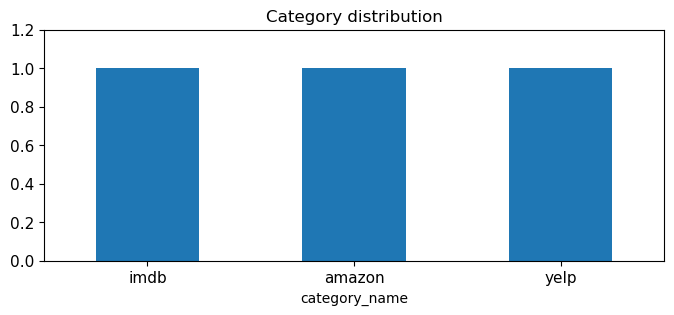

In [563]:
# Below, we attempted to plot a bar using the method provided by the exercise. However, due to the difference in the 
# datasets, we have to improvise. Hence, I did so in the other bar plot as the data represented in this bar plot has 
# little meaning.

category_df['category_name'].value_counts().plot(kind='bar', 
                                                 title='Category distribution', 
                                                 ylim=[0, 1.2], 
                                                 rot=0, 
                                                 fontsize=11, 
                                                 figsize=(8, 3))

plt.show()

score
1    507
0    493
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='score'>

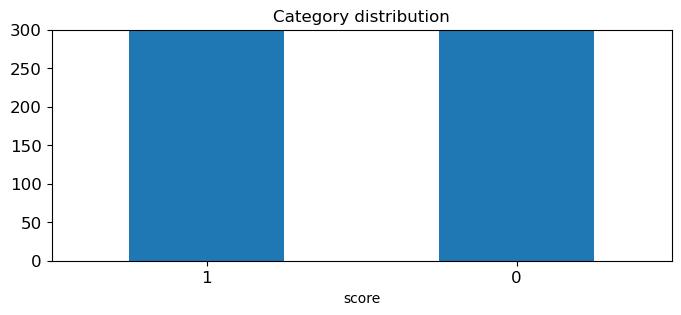

In [460]:
print(X_sample.score.value_counts())

# Plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [461]:
# EXERCISE SEVEN(7)

# This was achieved by simply commenting out the ylim parameter which hardcoded it ib the first place.

score
1    507
0    493
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='score'>

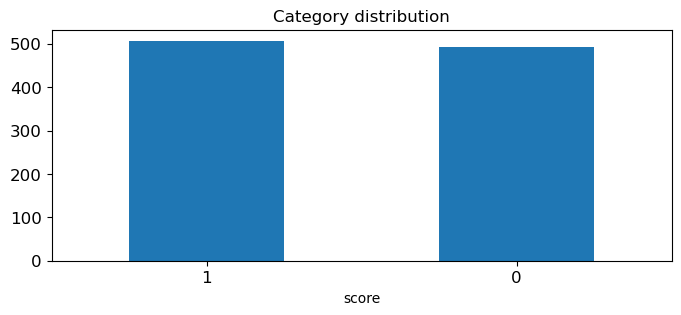

In [462]:
print(X_sample.score.value_counts())

# plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           #ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

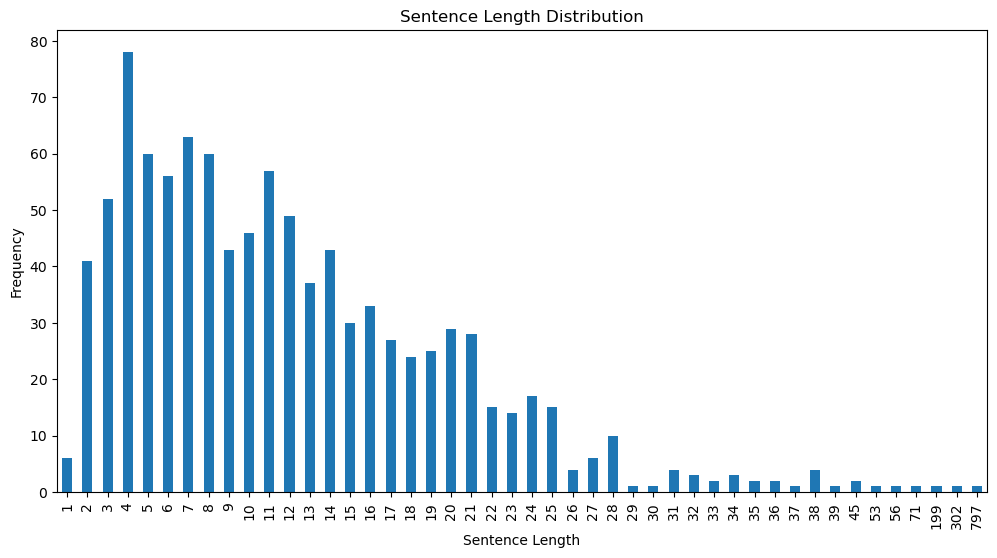

In [463]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot bar chart for sentence length
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = X_sample['sentence'].apply(lambda x: len(x.split())).value_counts().sort_index().plot(kind='bar', title='Sentence Length Distribution')
ax.set_xlabel('Sentence Length')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

In [464]:
# As we noticed above, using the guideline from the lab does not always output useful results for 
# data analysis, hence, I will utilize a different approach in this new dataset.

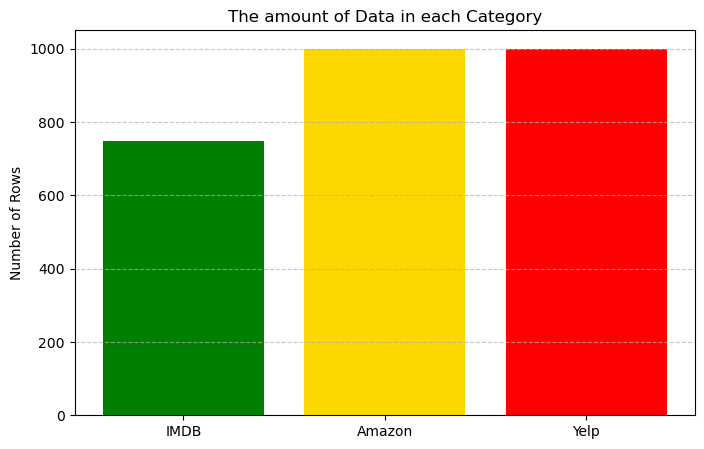

In [564]:
# Here, I decided to convert each dataset (.txt file) into a column and added all to the same chart. here we can get a 
# representation of data that each data frame(dataset) contains.

imdb_df_no_duplicates = imdb_df.drop_duplicates()
amazon_df_no_duplicates = amazon_df.drop_duplicates()
yelp_df_no_duplicates = yelp_df.drop_duplicates()


# Create a DataFrame for plotting
data = {'Dataset': ['IMDB', 'Amazon', 'Yelp'],
        'Number of Rows': [imdb_df.shape[0], amazon_df.shape[0], yelp_df.shape[0]]}
plot_df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(8, 5))
plt.bar(plot_df['Dataset'], plot_df['Number of Rows'], color=['green', 'gold', 'red'])
plt.xlabel('')  # ('') is used when you wish to hide the dataset label in the x-axis
plt.ylabel('Number of Rows')
plt.title('The amount of Data in each Category')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [466]:
# To validate the accuracy of the bar chart, we use the "len" function. 

In [467]:
# Print the lengths
print("Number of rows in imdb original dataset:", len(imdb_df))
print("Number of rows in amazon orignal dataset:", len(amazon_df))
print("Number of rows in yelp original:", len(yelp_df))

Number of rows in imdb original dataset: 748
Number of rows in amazon orignal dataset: 1000
Number of rows in yelp original: 1000


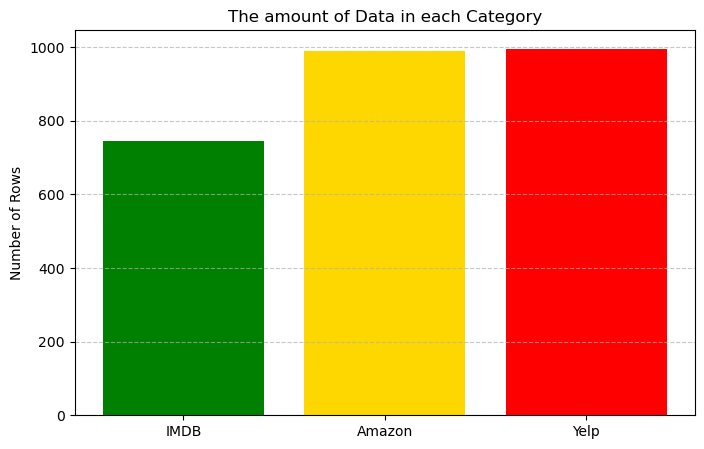

In [567]:
# After dropping duplicates from each Data Frame I reprinted the graph to show the difference.
imdb_dropdup = imdb_df.drop_duplicates()
amazon_dropdup = amazon_df.drop_duplicates()
yelp_dropdup = yelp_df.drop_duplicates()

# Create a DataFrame for plotting
data = {'Dataset': ['IMDB', 'Amazon', 'Yelp'],
        'Number of Rows': [imdb_dropdup.shape[0],
                            amazon_dropdup.shape[0],
                            yelp_dropdup.shape[0]]}

plot_df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(8, 5))
plt.bar(plot_df['Dataset'], plot_df['Number of Rows'], color=['green', 'gold', 'red'])
plt.xlabel('')  # ('') is used when you wish to hide the dataset label in the x-axis
plt.ylabel('Number of Rows')
plt.title('The amount of Data in each Category')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [469]:
# Get the lengths of the DataFrames without duplicates.

# Print the lengths
print("Number of rows in imdb after dropping duplicates:", len(imdb_dropdup))
print("Number of rows in amazon after dropping duplicates:", len(amazon_dropdup))
print("Number of rows in yelp after dropping duplicates:", len(yelp_dropdup))


Number of rows in imdb after dropping duplicates: 745
Number of rows in amazon after dropping duplicates: 990
Number of rows in yelp after dropping duplicates: 996


In [470]:
# EXERCISE EIGHT(8)

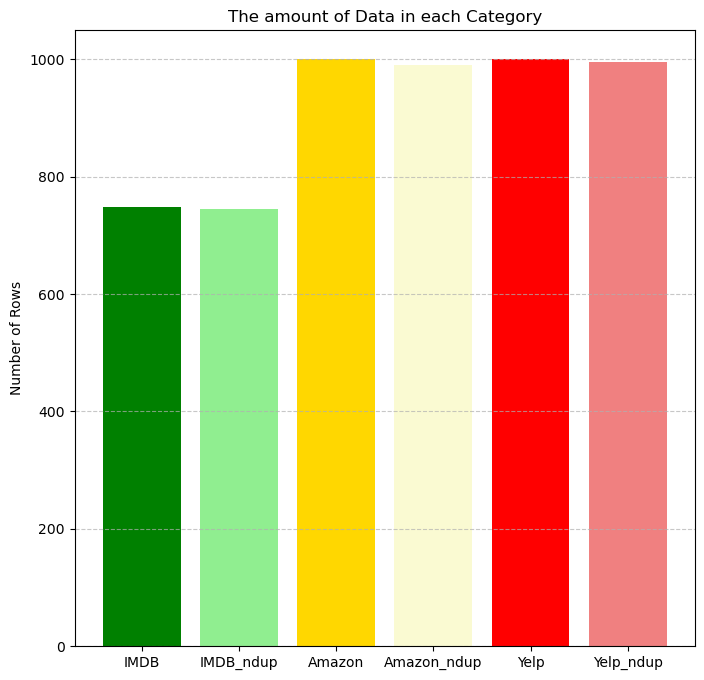

In [566]:
# 
data = {
    'Dataset': ['IMDB', 'IMDB_ndup', 'Amazon', 'Amazon_ndup', 'Yelp', 'Yelp_ndup'],
    'Number of Rows': [
        imdb_df.shape[0], imdb_dropdup.shape[0], amazon_df.shape[0],
        amazon_dropdup.shape[0], yelp_df.shape[0], yelp_dropdup.shape[0]
    ]
}

# Plot the bar graph
plt.figure(figsize=(8, 8))
plt.bar(data['Dataset'], data['Number of Rows'], color=['green', 'lightgreen', 'gold', 'lightgoldenrodyellow', 'red', 'lightcoral'])
plt.xlabel('')
plt.ylabel('Number of Rows')
plt.title('The amount of Data in each Category')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [472]:
# TOKENIZATION OF DATA

# 5.2 FEATURE CREATION

In [473]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elijah.f.albertson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [474]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [475]:
X[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [476]:
X[0:4]

,sentence,score,unigrams
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."


In [477]:
# Extracting data from the unigrams column that was just created (from the first row)

list(X[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

In [478]:
# TF-IDF FEATURES USING SCIK-LEARN.

In [479]:
# This code learns the vocabulary of my data set and returns a matrix in the form of a document. 

from sklearn.feature_extraction.text import TfidfVectorizer

corpus =  X['sentence'].tolist()

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [480]:
# This is a matrix representation of the data within the dataset that we are using. this is the
# native TD-IDF format. This is used by the programming languages to pinpoint the location of words.

print(X_tfidf)

  (0, 2764)	0.2754009111723178
  (0, 5139)	0.3168557569570176
  (0, 1401)	0.3566090128509877
  (0, 1331)	0.3566090128509877
  (0, 75)	0.20053968916243484
  (0, 2954)	0.17418850390154966
  (0, 166)	0.3566090128509877
  (0, 2956)	0.3089457396992936
  (0, 4133)	0.2567114025890028
  (0, 4890)	0.45862924803222244
  (1, 3166)	0.1897996305474199
  (1, 4949)	0.2973569662700217
  (1, 5037)	0.33352092414860707
  (1, 3097)	0.1177126837680302
  (1, 2072)	0.2821335386514833
  (1, 3005)	0.31171811169640373
  (1, 332)	0.3039363511036866
  (1, 3144)	0.1944604219640165
  (1, 764)	0.23248849780004954
  (1, 1778)	0.31171811169640373
  (1, 4531)	0.15545010533032866
  (1, 2700)	0.2821335386514833
  (1, 2931)	0.20290392475512908
  (1, 4968)	0.11762216089885134
  (1, 5032)	0.21518263196892515
  :	:
  (2730, 1387)	0.29231428586783736
  (2730, 5110)	0.29231428586783736
  (2730, 3437)	0.29231428586783736
  (2730, 3857)	0.26766396385898955
  (2730, 785)	0.23507801064747333
  (2730, 2068)	0.27789477186196
  (2730

In [481]:
# With this code shows a greater number of tokenized values than previously. it is easier to work with 
# as there are more words to choose from. It will ignore words that appear in over 80% of the document.
# Thus it has provided words that are better suited for tokenization. Also only 300 words with the highest 
# frequency are included.

vectorizer = TfidfVectorizer(max_df=0.8, max_features=300)
X_tfidf = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['10', 'about', 'absolutely', 'acting', 'actors', 'actually',
       'after', 'again', 'all', 'also', 'always', 'am', 'amazing', 'an',
       'and', 'another', 'any', 'anyone', 'are', 'around', 'as', 'at',
       'avoid', 'awesome', 'awful', 'back', 'bad', 'battery', 'be',
       'beautiful', 'because', 'been', 'before', 'being', 'best',
       'better', 'between', 'big', 'black', 'bluetooth', 'both', 'bought',
       'but', 'buy', 'by', 'came', 'camera', 'can', 'car', 'case', 'cast',
       'character', 'characters', 'charge', 'charger', 'cheap', 'chicken',
       'come', 'comfortable', 'cool', 'could', 'couldn', 'customer',
       'day', 'definitely', 'delicious', 'did', 'didn', 'disappointed',
       'do', 'does', 'doesn', 'don', 'done', 'down', 'ear', 'easy', 'eat',
       'end', 'enough', 'especially', 'even', 'ever', 'every', 'everyone',
       'everything', 'excellent', 'experience', 'family', 'fantastic',
       'far', 'feel', 'few', 'film', 'films', 'find', 'fine', 'firs

In [482]:
# So out of 300 words, we can select from the list of words that may be the most useful to
# tokenize. we can shorten this list and set the parameter to 90 or 95 if we want a shorter more 
# concise list.b

In [483]:
# Using Naive Bayes Clasifier using TF-DIF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [484]:
print(X.shape)

(2731, 3)


In [485]:
print('\n The TFIDF features of the Dataset:\n')

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.head()



 The TFIDF features of the Dataset:



,10,about,absolutely,acting,actors,actually,after,again,all,also,...,worked,working,works,worst,worth,would,year,years,you,your
0,0.0,0.340535,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.279854,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
# Splitting the data set into train and test data
print("\n Train-Test Split")

X_train, X_test, y_train, y_test = train_test_split(X['sentence'], X['score'], test_size=0.2, random_state=42)

print('\n Total number of Training Data:', y_train.shape)
print('\n Total number of Testing Data:', y_test.shape)


 Train-Test Split

 Total number of Training Data: (2184,)

 Total number of Testing Data: (547,)


In [487]:
# Training Naive Bayes (NB) Classifier using the max 300 tokenized words, 

# Vectorize the training set
vectorizer = TfidfVectorizer(max_df=0.8, max_features=300)
X_tfidf_train = vectorizer.fit_transform(X_train)

# Vectorize the testing set
X_tfidf_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_tfidf = MultinomialNB().fit(X_tfidf_train, y_train)

# Make predictions on the testing set
y_pred_tfidf = nb_tfidf.predict(X_tfidf_test)

# Now print out all elemensts of NB classifier
print("\nNaive Bayes with TF-IDF Features:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Precision:", precision_score(y_test, y_pred_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tfidf, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


Naive Bayes with TF-IDF Features:

Accuracy: 0.7659963436928702
Confusion Matrix:
 [[203  65]
 [ 63 216]]
Precision: 0.7659761412091974
Recall: 0.7659963436928702
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       268
           1       0.77      0.77      0.77       279

    accuracy                           0.77       547
   macro avg       0.77      0.77      0.77       547
weighted avg       0.77      0.77      0.77       547



In [488]:
# Training Naive Bayes (NB) Classifier; After having seen the previous accuracy and precision statistics,
# I decided to use the entire data to see whether those statistics would return better results and they did.

# Vectorize the training set
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(X_train)

# Vectorize the testing set
X_tfidf_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_tfidf = MultinomialNB().fit(X_tfidf_train, y_train)

# Make predictions on the testing set
y_pred_tfidf = nb_tfidf.predict(X_tfidf_test)

# Now print out all elemensts of NB classifier
print("\nNaive Bayes with TF-IDF Features:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Precision:", precision_score(y_test, y_pred_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tfidf, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


Naive Bayes with TF-IDF Features:

Accuracy: 0.8244972577696527
Confusion Matrix:
 [[223  45]
 [ 51 228]]
Precision: 0.8247308543549486
Recall: 0.8244972577696527
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       268
           1       0.84      0.82      0.83       279

    accuracy                           0.82       547
   macro avg       0.82      0.82      0.82       547
weighted avg       0.82      0.82      0.82       547



In [489]:
# Using Naive Bayes Clasifier word count/ word frequency feature

In [490]:
# Training Naive Bayes (NB) Classifier with Word Frequency Features

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count_train = count_vectorizer.fit_transform(X_train)
X_count_test = count_vectorizer.transform(X_test)

nb_count = MultinomialNB().fit(X_count_train, y_train)

# Make predictions
y_pred_count = nb_count.predict(X_count_test)

# Now print out all elements of Word Frequency classifier
print("\nNaive Bayes with Word Frequency Features:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print("Precision:", precision_score(y_test, y_pred_count, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_count, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_count))



Naive Bayes with Word Frequency Features:

Accuracy: 0.8226691042047533
Confusion Matrix:
 [[227  41]
 [ 56 223]]
Precision: 0.8238366589128213
Recall: 0.8226691042047533
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       268
           1       0.84      0.80      0.82       279

    accuracy                           0.82       547
   macro avg       0.82      0.82      0.82       547
weighted avg       0.82      0.82      0.82       547



In [491]:
# Both classifiers performed relatively the same, having similar accuracy 
# and confusion matrices. That being said, however, the TF-IDF, had a slight upper hand in 
# precision and accuracy. In short, both tests were similar with the TF-IDF having a small 
# marginal advantage


In [492]:
#FEATURE SUBSET SELECTION

In [493]:
X_counts_vectorizer = CountVectorizer()
X_counts = X_counts_vectorizer.fit_transform(combined_df['sentence'])

# Display the shape of the document-term matrix
print(X_counts.shape)

# Display the first row of the document-term matrix
print(X_counts[0])


(2748, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [494]:
# Shows the 3500th word in the dataset. Likewise, a different parameter will result in a mapped
# worked. 

X_counts_vectorizer.get_feature_names_out()[3500]

'program'

In [495]:
# For example this is the last word in the data set within the sentence column
X_counts_vectorizer.get_feature_names_out()[5154]

'zombiez'

In [496]:
# Using a term-document matrix and its analyzer to mine potential "token" words from the sentence column
# in the dataset. 
analyze = X_counts_vectorizer.build_analyzer()
analyze(X.sentence[0])

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [497]:
# EXERCISE NINE(9)

print(X.sentence[0])
analyze(X.sentence[0])

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  


['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [498]:
analyze(" ".join(list(X[:1].sentence)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [499]:
# We can check the shape of this matrix and feature names of vectorizer by:
X_counts.shape

(2748, 5155)

In [500]:
X_counts_vectorizer.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [501]:
X_counts.shape

(2748, 5155)

In [502]:
# Converting from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [503]:
X_counts_vectorizer.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [504]:
# EXERCISE TEN(10)

In [505]:
# Here, we realized that index "1" has occurred once in the data frame hence we find it and decode it.
# Call a function to scan through the 

row_index = 0  # Change this to any desired row index.

indices_of_1s = X_counts.getrow(row_index).indices

# Check if there are any occurences of  "1"
if len(indices_of_1s) >= 1:
    
    # Get the index of the occurence of "1"
    locate_1 = indices_of_1s[1]

    # To decode the word represented by the "1"
    word_for_1 = count_vectorizer.get_feature_names_out()[locate_1]

    # Use the print function to print the word
    print(word_for_1)
else:
    print("There are not enough occurrences of '1' in the specified row.")


trash


In [506]:
# Creating a heat map.

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18th', 'term_1928', 'term_1947', 'term_1949', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998']


In [507]:
# Obtain document index

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [508]:
plot_z = X_counts[0:20, 0:20].toarray()

#X_counts[how many documents, how many terms]

print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18th,term_1928,term_1947,term_1949,term_1973,term_1979,term_1980,term_1986,term_1995,term_1998
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


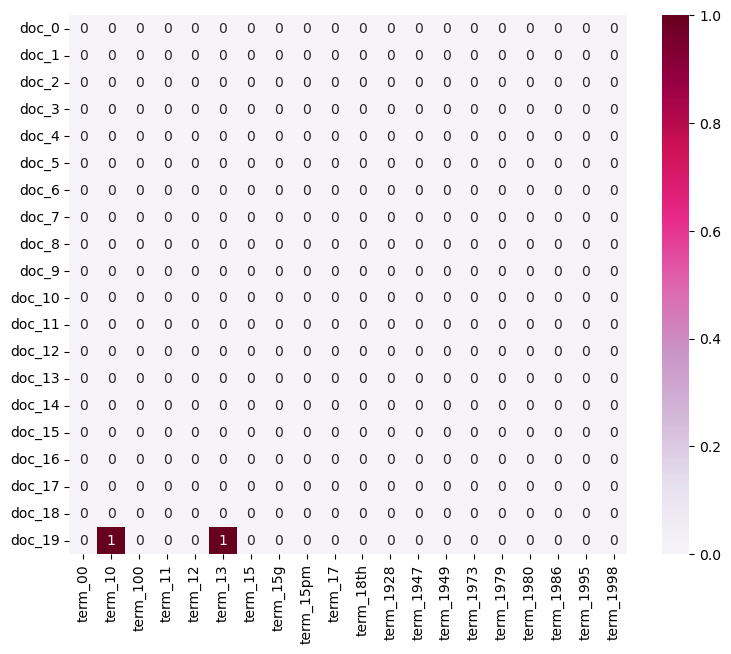

In [509]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

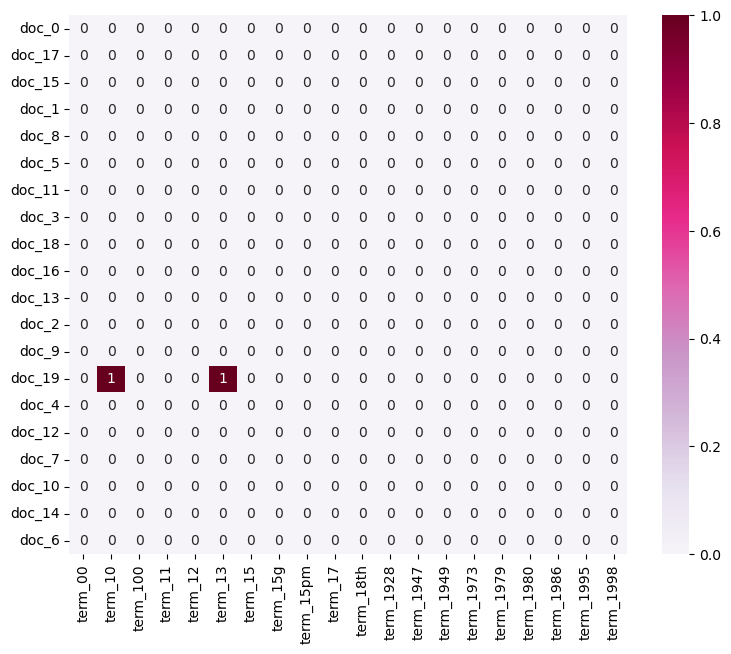

In [510]:
# Similar to the lab assignment, I constructed a heat amp with 20 random samples, as a way to reduce noise 
# in the dataset as well as to extract more meaningful data.


import seaborn as sns

# Assuming df_todraw is your DataFrame
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Generate a random sample (e.g., 10% of the data)
sample_size = 20
df_todraw_sample = df_todraw.sample(n=sample_size, random_state=42)

# Plot the heatmap using Seaborn
plt.figure(figsize=(9, 7))
ax = sns.heatmap(df_todraw_sample, cmap="PuRd", vmin=0, vmax=1, annot=True)

plt.show()

In [511]:
# EXERCISE ELEVEN(11)

# RANDOM SAMPLING: The first thing that can be done to get more efficiency and more useful results is to extract random samples. Contd.
# so rather than using the first twenty terms, one can write a code and then word select a term where the most activity. contd.
# takes place, or so to speak where most of the data is stored at the moment.

# DIMENTIONALITY(noise)REDUCTION techniques: One probably removes the number of categories, so that the data is easier to group. 

# Below I have attempted to utilize the random sampling method. Every time the code is executed, different 
# results are shown. in some datasets there are no data stored hence we only get zeros. 
# given a sample size of 20. the sample size can be adjusted.


In [512]:
# DIMENSIONALITY REDUCTION

In [513]:
# Creating a Principal Component Analysis to reduce data ddimensions
from sklearn.decomposition import PCA

In [514]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2748, 5155)
(2748, 2)


In [515]:
X_reduced.shape

(2748, 2)

In [516]:
combined_df

,sentence,score,numeric_score
0,"A very, very, very slow-moving, aimless movie ...",0,0
1,Not sure who was more lost - the flat characte...,0,0
2,Attempting artiness with black & white and cle...,0,0
3,Very little music or anything to speak of.,0,0
4,The best scene in the movie was when Gerardo i...,1,1
...,...,...,...
2743,I think food should have flavor and texture an...,0,0
2744,Appetite instantly gone.,0,0
2745,Overall I was not impressed and would not go b...,0,0
2746,"The whole experience was underwhelming, and I ...",0,0


In [517]:
categories

['imdb', 'amazon', 'yelp']

In [518]:
# DEBUGGING dimensionality reduction

# Since I was experiencing an index mismatch issue, and I was unable to plot
# the scatterplot X as a subset of X_reduced, I decided to plot both datasets on the same 
# diagram using a different method.


In [519]:
print("Number of rows in X:", X.shape[0])
print("Number of rows in X_reduced:", X_reduced.shape[0])

Number of rows in X: 2731
Number of rows in X_reduced: 2748


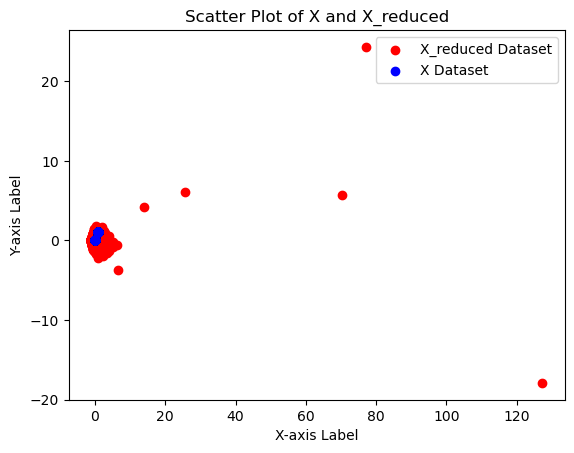

In [520]:
import matplotlib.pyplot as plt

# Scatter plot for X_reduced
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='red', label='X_reduced Dataset')

# Scatter plot for X
plt.scatter(X['score'], X['score'], c='blue', label='X Dataset')

# Set labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of X and X_reduced')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [521]:
# EXERCISE TWELVE(12) [An Attempt]

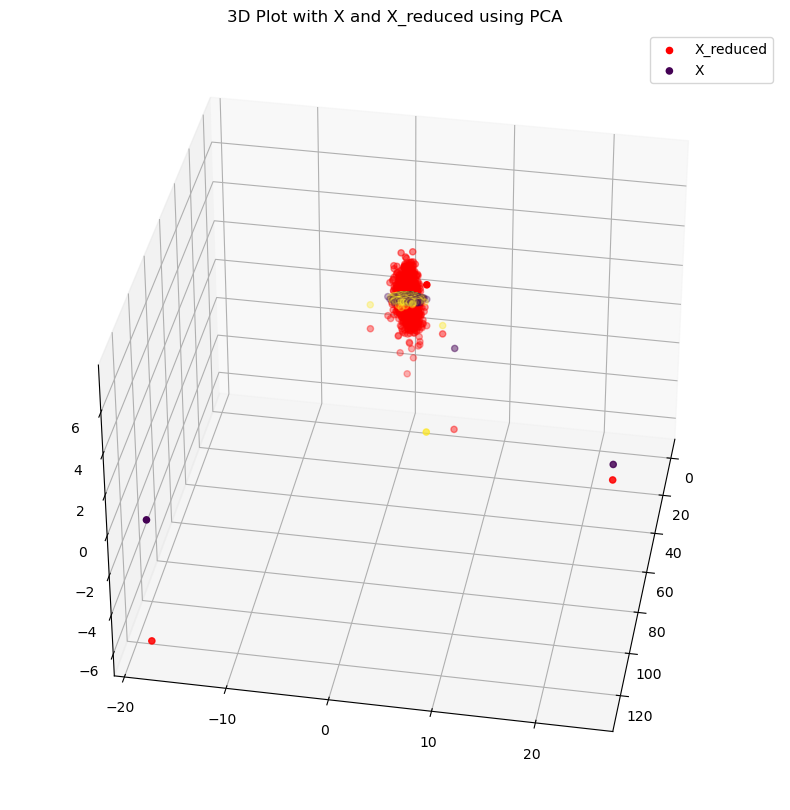

In [522]:
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())
X_2d = PCA(n_components=2).fit_transform(X_counts.toarray())

# Create the plot
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points for X_reduced
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c='red', marker='o', label='X_reduced')

# Plot the points for X_reduced, colored by their scores
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=scores, marker='o', label='X')

# Set the viewing angle
ax.view_init(elev=35, azim=10)

# Add a title and legend
plt.title('3D Plot with X and X_reduced using PCA')
plt.legend()

# Show the plot
plt.show()


In [523]:
# ATTRIBUTE TRANSFORMATION/AGGREGATION

In [524]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

5155


In [525]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [526]:
#sum of first term: 00

term_frequencies[0]

1

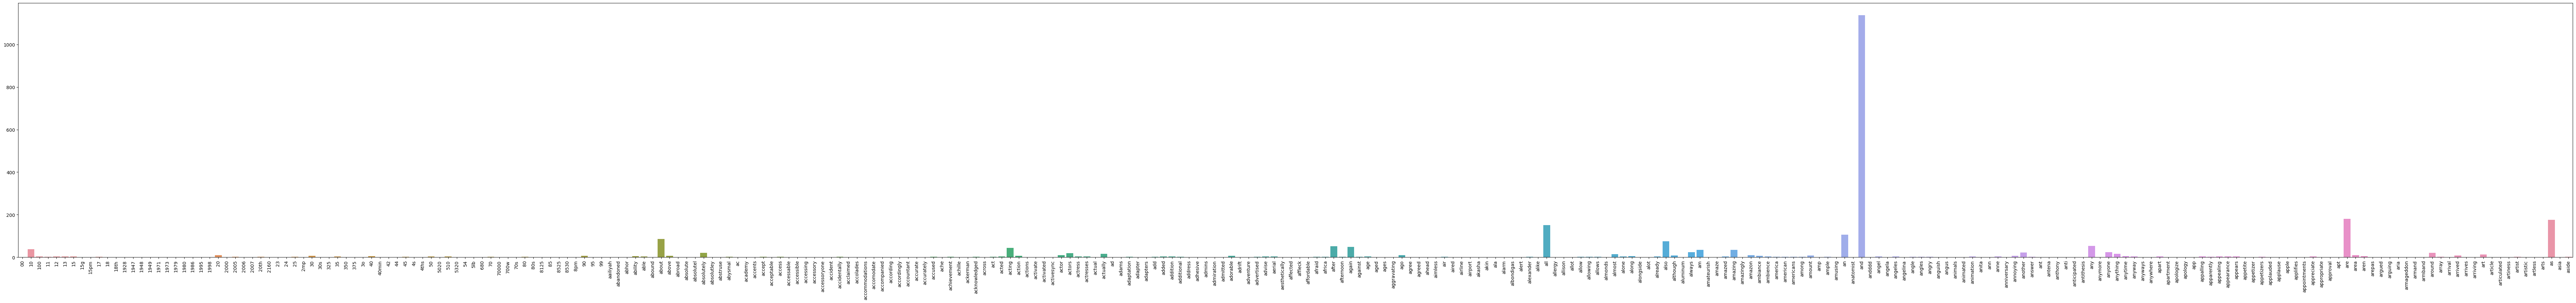

In [527]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=X_counts_vectorizer.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(X_counts_vectorizer.get_feature_names_out()[:300], rotation = 90);

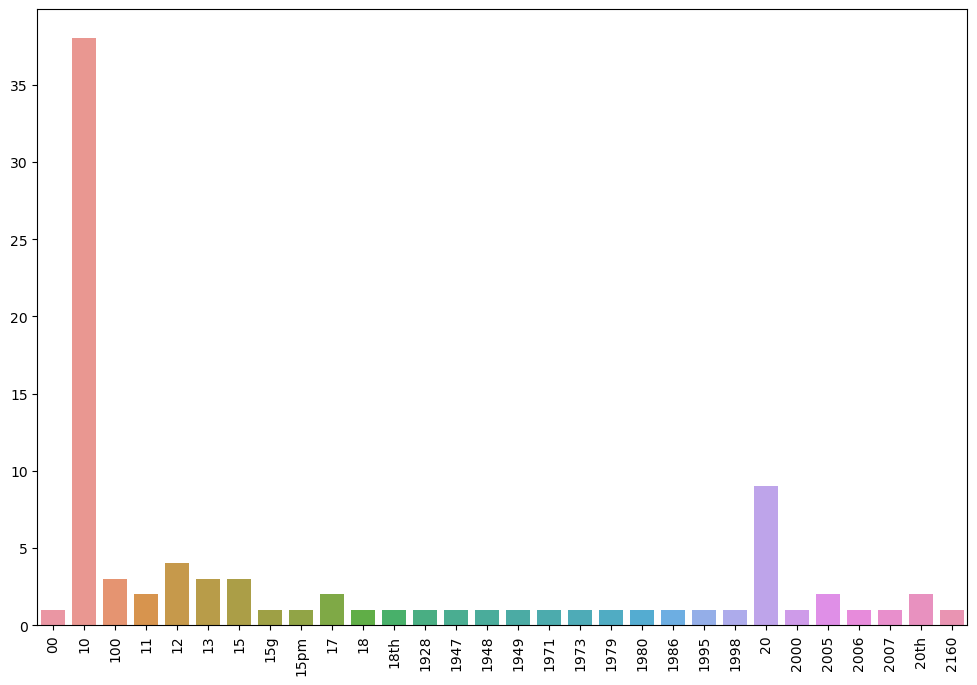

In [528]:
# EXERCISE THIRTEEN(13)

plt.subplots(figsize=(12, 8))
g = sns.barplot(x=X_counts_vectorizer.get_feature_names_out()[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(X_counts_vectorizer.get_feature_names_out()[:30], rotation = 90);

# Rather than changing the plot style entirely, I decided to make the plot more readable by adjusting the visualization
# settings. I did so by changing the frequency of 300 t0 30, thus one can easily tell what is happening in a small sample
# sample of data. Although this isn't always ideal for precise data representation, reducing noises can pinpoint certain
# or one can say the most relevant data needed by the researcher.


In [529]:
# EXERCISE FOURTEEN(14)


import plotly.express as px

# 50 terms and their frequencies
top_terms_df = pd.DataFrame({
    'Term': X_counts_vectorizer.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Create a bar graph using Plotly 
fig = px.bar(top_terms_df, x='Term', y='Frequency',
             title='Top 50 Term Frequencies',
             labels={'Frequency': 'Term Frequency', 'Term': 'Terms'},
             width=1000, height=500)

# Update layout for better x-axis label visibility
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()


In [530]:
# EXERCISE FIFTEEN(15) 

# 50 terms and their frequencies: we can change the 
top_terms_df = pd.DataFrame({
    'Term': X_counts_vectorizer.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Sort DataFrame in descending order based on 'Frequency'
top_terms_df = top_terms_df.sort_values(by='Frequency', ascending=False)

# Create a bar graph using Plotly 
fig = px.bar(top_terms_df, x='Term', y='Frequency',
             title='Long tail Distritbution of Frequencies',
             labels={'Frequency': 'Term Frequency', 'Term': 'Terms'},
             width=1000, height=500)

# Update layout for better x-axis label visibility
fig.update_layout(xaxis=dict(tickangle=45, showticklabels =False),
                 title_x=0.5)

# Show the plot
fig.show()


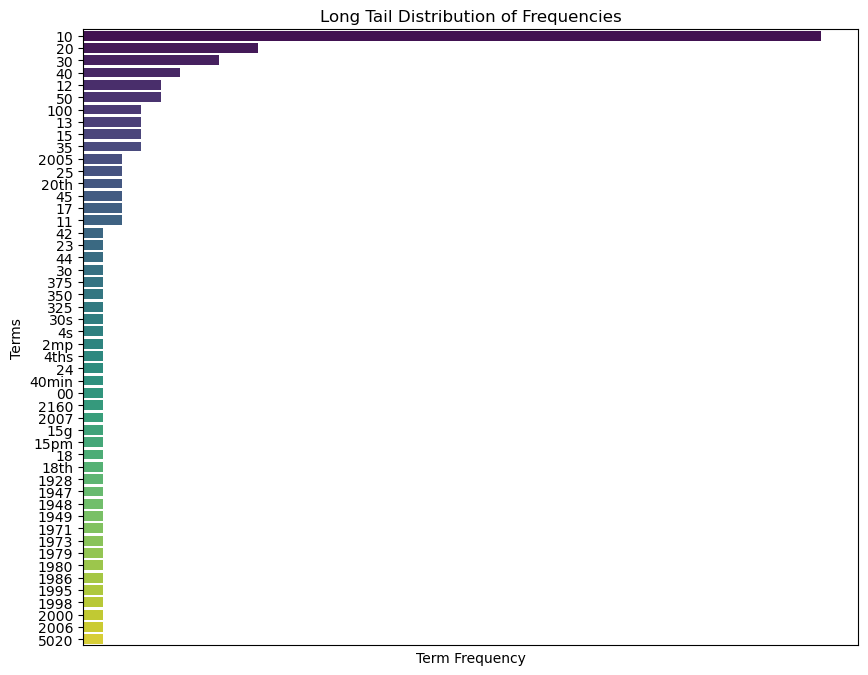

In [531]:
# Using seaborn to plot this same bargraph but in a different way. (Horizontally)

top_terms_df = pd.DataFrame({
    'Term': X_counts_vectorizer.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Sort DataFrame in descending order based on 'Frequency'
top_terms_df = top_terms_df.sort_values(by='Frequency', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Term', data=top_terms_df, palette='viridis')

# Set labels and title
plt.xlabel('Term Frequency')
plt.ylabel('Terms')
plt.title('Long Tail Distribution of Frequencies')

# Remove x-axis labels
plt.xticks([])

# Show the plot
plt.show()


In [532]:
!pip install wordcloud

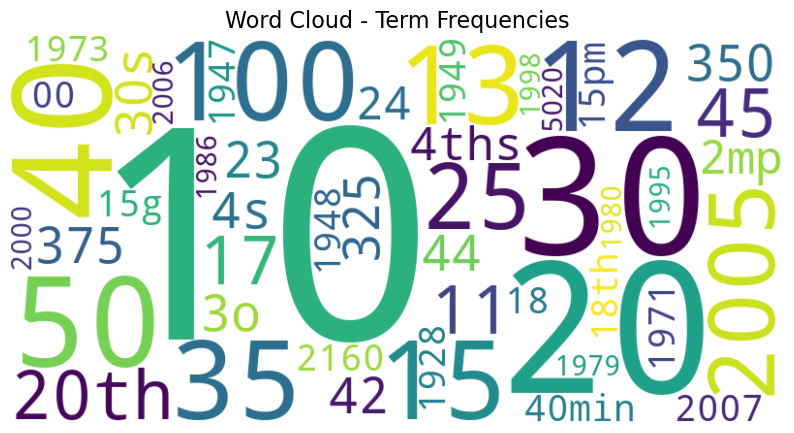

In [533]:
from wordcloud import WordCloud

# For visual creativity I decided to generate a word cloud using the Wordclod library to show the term frequencies
# The larger numbers are the most used term frequencies whereas the smaller numbers are the least used.

top_terms_df = pd.DataFrame({
    'Term': X_counts_vectorizer.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Sort DataFrame in descending order based on 'Frequency'
top_terms_df = top_terms_df.sort_values(by='Frequency', ascending=False)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_terms_df['Term'], top_terms_df['Frequency'])))

# Set up the plot
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set title
plt.title('Word Cloud - Term Frequencies', fontsize=16)

# Show the plot
plt.show()


In [534]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


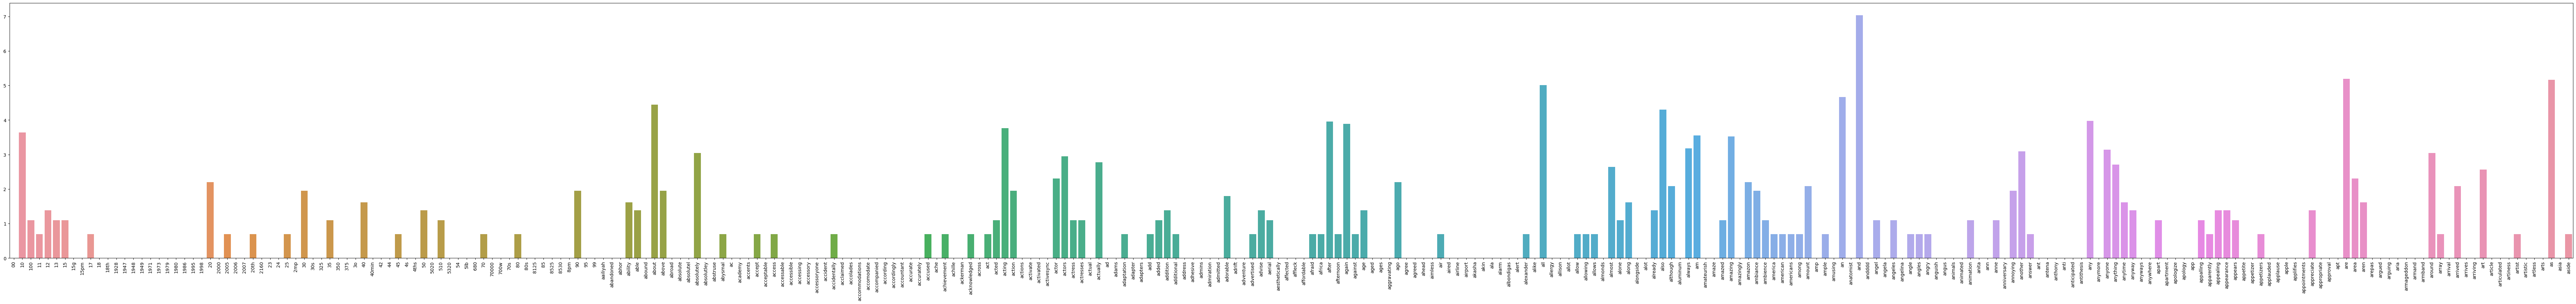

In [535]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=X_counts_vectorizer.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(X_counts_vectorizer.get_feature_names_out()[:300], rotation = 90)

In [536]:
# DISCRETIZATION AND BINARIZATION

In [537]:
# For the purpose of the exercise, We will test the data on scores although it already seemed to be in a binary format.

In [538]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [539]:
mlb = preprocessing.LabelBinarizer()

In [542]:
import numpy as np

In [543]:
mlb.fit(X.score)

LabelBinarizer()

In [547]:
from sklearn.preprocessing import LabelBinarizer

In [548]:
X['bin_score'] = mlb.transform(X['score']).tolist()


In [549]:
X[0:9]

,sentence,score,unigrams,bin_score
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0]
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",[0]
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",[0]
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",[1]
5,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0]
6,Wasted two hours.,0,"[Wasted, two, hours, .]",[0]
7,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was...",[1]
8,A bit predictable.,0,"[A, bit, predictable, .]",[0]


In [550]:
# However, we will still run this code with the sentence column to demonstrate how binarization 
# works but as we can see it returns just zero, indicating that the score column is better suited 
# for providing Discretization and Binarization results.

In [551]:
mlb.fit(X.sentence)

LabelBinarizer()

In [552]:
X['bin_sentence'] = mlb.transform(X['sentence']).tolist()

In [553]:
X[0:9]

,sentence,score,unigrams,bin_score,bin_sentence
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Wasted two hours.,0,"[Wasted, two, hours, .]",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was...",[1],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,A bit predictable.,0,"[A, bit, predictable, .]",[0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [554]:
# DATA EXPLORATION

In [555]:
# Data from random record

document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [556]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["The directing and the cinematography aren't quite as good.  "]
['If you do go see this movie, bring a pillow or a girlfriend/boyfriend to keep you occupied through out.  ']
["It's just lame.  "]


In [557]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = X_counts_vectorizer.transform(document_to_transform_1)
document_vector_count_2 = X_counts_vectorizer.transform(document_to_transform_2)
document_vector_count_3 = X_counts_vectorizer.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())
(1, 35788)

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


(1, 35788)

In [558]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [559]:
# Number four of Homework Assignment:
    
# The first inconsistency is the way we handled missing values. That is rather, than processing or using a data mining 
# process called inputting or even a predictive model, we deleted the missing values. Deleting a missing NaN value can lead to loss of pertinent 
# information contained in that row or column. For example, maybe just a single attribute wasn't recorded while all 
# other data was intact. We would not know that since we never evaluated the data before we dropped it.

# Secondly, similar to dropping missing values, dropping duplicate data can also affect the quality of your data. 
# In this particular situation, dropping duplicates from a combined data set may have not been the ideal practice. This is
# because the dataset contained reviews from reviewers across three different platforms. it may be a coincidence that two very different
# reviewers said the same thing on two different platforms.

# Thirdly, while data splitting is a common data mining or machine learning tactic it has both its advantages and drawbacks. For example, it can 
# monitor the models' performance and help prevent overfitting; it helps train a model using the right parameters and algorithms and it can also be used 
# to tune hyperparameters. However, some other issues can arise. Such as allocating too much data in the training model which can ultimately lead to 
# overfitting issues. On the other hand, if you assign too little data, we run the risk of underfitting the model. 

# Another inefficient may have occurred at the initial data processing stage. That is, during the cleaning process, we could have removed or handled all outliers. 
# Those outliers may lead to inaccurate results from data training models down the line. As a result, it could have affected the model's 

# In this model, the Binarization process proved meaningless. this is mainly because the data was already in binary format to begin with. Hence, this part of the lab
# was not necessary for this dataset.  


In [560]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~END~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~